In [22]:
# Install TensorFlow

import tensorflow as tf
print(tf.__version__)

# additional imports
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

2.1.0


In [23]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Split data into training and testing
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalising the data between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# Printing out the shapes 
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

# number of classes
K = len(set(y_train))
print("number of classes:", K)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)
number of classes: 10


In [24]:
# Instantiating our Sequential model.
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))



In [25]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# We are using earlystop to prevent model acc from deviating from val_acc above 3 epochs
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', 
                           restore_best_weights=True )



In [26]:
# Fit without augmentation
model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[early_stop], epochs=30)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 14s 283us/sample - loss: 1.3563 - accuracy: 0.5363 - val_loss: 1.0196 - val_accuracy: 0.6491
Epoch 2/30
50000/50000 [==============================] - 11s 224us/sample - loss: 0.8989 - accuracy: 0.6884 - val_loss: 0.7846 - val_accuracy: 0.7332
Epoch 3/30
50000/50000 [==============================] - 11s 218us/sample - loss: 0.7521 - accuracy: 0.7416 - val_loss: 0.7403 - val_accuracy: 0.7507
Epoch 4/30
50000/50000 [==============================] - 11s 223us/sample - loss: 0.6479 - accuracy: 0.7789 - val_loss: 0.7377 - val_accuracy: 0.7524
Epoch 5/30
50000/50000 [==============================] - 11s 223us/sample - loss: 0.5629 - accuracy: 0.8087 - val_loss: 0.6971 - val_accuracy: 0.7609
Epoch 6/30
50000/50000 [==============================] - 11s 226us/sample - loss: 0.4943 - accuracy: 0.8302 - val_loss: 0.5860 - val_accuracy: 0.8070
Epoch 7/30
50000/50000 [====================

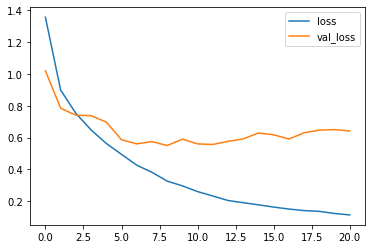

In [27]:
# Plot loss per iteration
# Model shows clear signs of overfitting
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

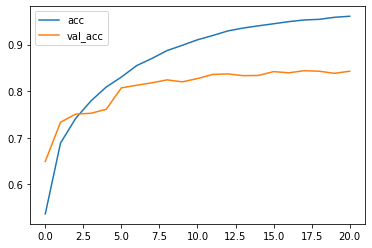

In [28]:
# Plot accuracy per iteration
plt.plot(model.history.history['accuracy'], label='acc')
plt.plot(model.history.history['val_accuracy'], label='val_acc')
plt.legend()

In [29]:
# Using ReducedLrOnPlateau to change learning rate if val_loss doesnt decrease after 5 epochs
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [30]:
# Fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
model.fit(train_generator, validation_data=(x_test, y_test),callbacks=[reduce_lr], steps_per_epoch=steps_per_epoch, epochs=30,)

  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/30
1562/1562 [==============================] - 26s 16ms/step - loss: 0.5847 - accuracy: 0.8096 - val_loss: 0.4847 - val_accuracy: 0.8369
Epoch 2/30
1562/1562 [==============================] - 22s 14ms/step - loss: 0.4886 - accuracy: 0.8371 - val_loss: 0.4847 - val_accuracy: 0.8449
Epoch 3/30
1562/1562 [==============================] - 20s 13ms/step - loss: 0.4489 - accuracy: 0.8492 - val_loss: 0.5196 - val_accuracy: 0.8347
Epoch 4/30
1562/1562 [==============================] - 19s 12ms/step - loss: 0.4237 - accuracy: 0.8563 - val_loss: 0.5008 - val_accuracy: 0.8367
Epoch 5/30
1562/1562 [==============================] - 20s 12ms/step - loss: 0.4122 - accuracy: 0.8589 - val_loss: 0.4543 - val_accuracy: 0.8477
Epoch 6/30
1562/1562 [==============================] - 19s 12ms/step - loss: 0.4005 - accuracy: 0.8636 - val_loss: 0.4642 - val_accuracy: 0.8454
Epoch 7/30
1562/1562 [=============================

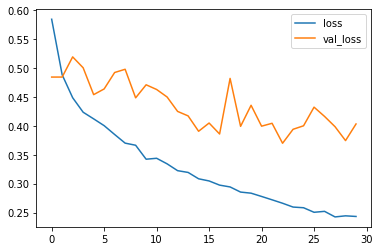

In [31]:
# Plot loss per iteration
# Although the val_loss is unstable, it oscillates between a small interval.
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

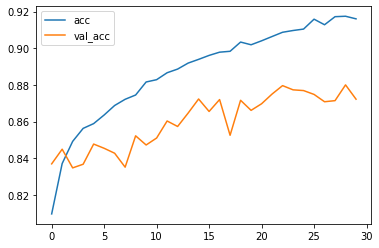

In [32]:
# Plot accuracy per iteration
# Val_acc follows a similiar trend.
plt.plot(model.history.history['accuracy'], label='acc')
plt.plot(model.history.history['val_accuracy'], label='val_acc')
plt.legend()

In [33]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix,classification_report


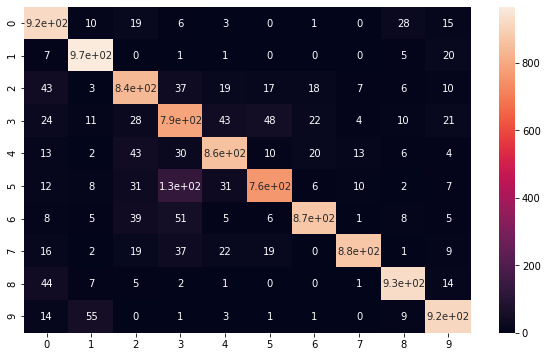

In [34]:
labels_data = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

p_test = model.predict(x_test).argmax(axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,p_test),annot=True)

In [35]:
print(classification_report(y_test,p_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1000
           1       0.90      0.97      0.93      1000
           2       0.82      0.84      0.83      1000
           3       0.73      0.79      0.76      1000
           4       0.87      0.86      0.86      1000
           5       0.88      0.76      0.82      1000
           6       0.93      0.87      0.90      1000
           7       0.96      0.88      0.92      1000
           8       0.93      0.93      0.93      1000
           9       0.90      0.92      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [36]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

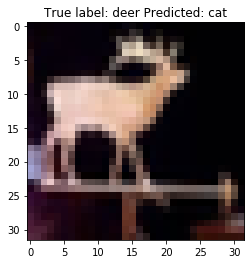

In [37]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

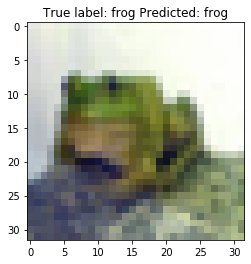

In [38]:
# Correctly classified examples
classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

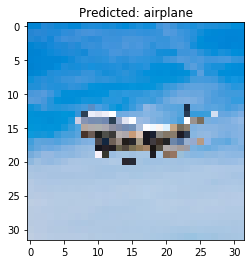

In [39]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# predicting images
path=r'C:\Users\karth\Documents\Deep Learning\airplane.jpg'
img=image.load_img(path, target_size=(32,32))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images)
classes
# Correctly classified examples
i = classes[0]
plt.imshow(img, cmap='gray')
plt.title("Predicted: %s" % (labels[i]));



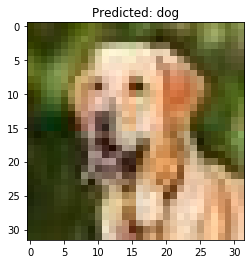

In [40]:
# predicting images
path=r'C:\Users\karth\Documents\Deep Learning\Dog.jpg'
img=image.load_img(path, target_size=(32,32))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images)
classes
# Correctly classified examples
i = classes[0]
plt.imshow(img, cmap='gray')
plt.title("Predicted: %s" % (labels[i]));

In [41]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            multiple                  896       
_________________________________________________________________
batch_normalization_6 (Batch multiple                  128       
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  9248      
_________________________________________________________________
batch_normalization_7 (Batch multiple                  128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_8 (Conv2D)            multiple                  18496     
_________________________________________________________________
batch_normalization_8 (Batch multiple                 

In [42]:
# model.save(r'C:\Users\karth\Documents\Deep Learning\project_ReducedLr')